在研究机器学习时，经常会遇到特征数比较多的情况。特征提取的过程中，提取的特征维数太多经常会导致特征匹配时过于复杂，消耗系统资源，不得不采用特征降维的方法。所谓特征降维，即采用一个低纬度的特征来表示高纬度。(引用自博客http://blog.csdn.net/xl890727/article/details/16898315)

特征降维一般有两类方法：特征选择和特征抽取。
- 特征选择即从高纬度的特征中选择其中的一个子集来作为新的特征。比如有20个特征，从中选取10个比较重要的进行研究。
- 特征抽取是指将高纬度的特征经过某个函数映射至低维度作为新的特征。常用的特征抽取方法就是PCA。下面着重介绍PCA。

## 降维的目的

使用降维后的数据表示是因为:

- 在原始的高维空间中，包含有冗余信息以及噪音信息，在实际应用例如图像识别中造成了误差，降低了准确率；而通过降维,我们希望减少冗余信息所造成的误差,提高识别（或其他应用）的精度。

- 或者希望通过降维算法来寻找数据内部的本质结构特征。

- 通过降维来加速后续计算的速度

- 还有其他很多目的，如解决数据的sparse问题

在很多算法中，降维算法成为了数据预处理的一部分，如PCA。事实上，有一些算法如果没有降维预处理，其实是很难得到很好的效果的。

Principal Component Analysis(PCA)是最常用的线性降维方法，它的目标是通过某种线性投影，将高维的数据映射到低维的空间中表示，并期望在所投影的维度上数据的方差最大，以此使用较少的数据维度，同时保留住较多的原数据点的特性。
![PCA](pic/pca1.png)

通俗的理解，如果把所有的点都映射到一起，那么几乎所有的信息（如点和点之间的距离关系）都丢失了，而如果映射后方差尽可能的大，那么数据点则会分散开来，以此来保留更多的信息。可以证明，PCA是丢失原始数据信息最少的一种线性降维方式。（实际上就是最接近原始数据，但是PCA并不试图去探索数据内在结构）【http://www.cnblogs.com/xbinworld/archive/2011/11/24/pca.html】

![PCA](pic/pca2.png)

##  模型

假设当前有m个样本点$(x_1, x_2, ..., x_m)$，每个样本$x_i \in R^n$。现在需要将这m个点投影到k维空间，使得投影后的点方差尽可能大。
- 样本：$X \in R^{m*n}$
- 转换矩阵：$W \in R^{n*k}$，可以写成$(w_1, w_2, ...,w_n)$，其中任意两个转换向量正交 $WW^T=I$
- 转换后的坐标：$Z = XW \in R^{m*k}$,可以写成$(z_1, z_2, ...,z_m)$，其中$z_i \in R^k$。

目标函数(方差)：
$$
var = \frac {1}{m-1}\sum_{i=1}^m \mid\mid z_i - \bar z \mid\mid^2$$

其中$\bar z$是投影后的坐标均值。

$z_i =x_iW, \ \bar z = \bar x W, \ Z=XW$，在预处理阶段我们已经将原始数据X归一化，归一化后均值为0. 归一化后方差可以写成矩阵迹的形式（矩阵迹也就是矩阵对角线值之和）。

$$
\sum_{i=1}^m \mid\mid z_i\mid\mid^2=\sum_{i=1}^m\sum_{j=1}^kz_{ij}^2=\mid\mid Z\mid\mid^2=tr(Z^TZ)=\sum_{j=1}^k(Z^TZ)_{jj}=\sum_{j=1}^k(\sum_{i=1}^mz^T_{ji}z_{ij})$$

将z代入：

$$
var = \frac {1}{m-1}\sum_{i=1}^m \mid\mid x_iW\mid\mid^2=\frac {1}{m-1} tr({W^TX^TXW})$$

PCA思想就是在$WW^T=I$下方差最大， 需要求解的就是W：
$$ max \ var=\frac {1}{m-1} tr({W^TX^TXW})$$

$$s.t. WW^T=I$$

注意，通过矩阵行向量形式，我们可以得到：
$$X=\{x_1, x_2, ..., x_m\}^T, X^T=\{x_1^T, x_2^T, ...,x_m^T\}$$

$$X^TX=\sum_{i=1}^{m}x_i^Tx_i(协方差矩阵)$$

$x_i$是行向量，$x_i^T$是列向量，所以$x_i^Tx_i \in R^{n*n}$是n行n列矩阵。

在支持矢量机里面我们提到过拉格朗日变换，将带约束条件的规划问题写成一个表达式求极值。

$$J(W) = \frac {1}{m-1} tr({W^T(X^TX)W}) + \lambda (WW^T-I)$$

也可以对$\lambda$进行放缩，去掉(m-1)：

$$J(W) = tr(W^T(X^TX)W) + 2\lambda (WW^T-I)$$

对W求导，注意：
$$\frac {\partial tr(AB)}{\partial A} =\frac {\partial \sum_{i=1}^m(AB)_{ii}}{\partial A}=\frac {\partial \sum_{i=1}^m\sum_{j=1}^kA_{ik}B_{ki}}{\partial A}=\frac {\partial tr(BA)}{\partial A} = B^T$$

$$\frac {\partial tr(A^TB)}{\partial A} = B$$


$$\frac {\partial tr(W^T(X^TX)W)}{\partial W}=X^TXW + (W^T(X^TX))^T=2X^TXW$$
也就是：
$$X^TXW= \lambda W$$

也就是线下代数中对矩阵求特征根和特征向量。这里的W实际上对应的就是协方差矩阵的特征向量。

## 算法流程

- 1.对原始数据进行归一化
- 2.计算样本的协方差矩阵
- 3.对协方差矩阵进行特征值分解
- 4.取出最大的k个特征值所对应的特征向量，归一化后组成特征向量矩阵W
- 5.对样本中的每一个点进行转化，求解新的点

可以通过对转换后的方差占原始数据方差百分比设置门限来确定转换后的维数，比如原始数据20维，降到15维后方差比为95%，那么我们就取k=15。
注意：PCA不是万能的，如果原始数据中有噪声，通过降维恰好去掉了数据中的噪声，那么机器学习的最终结果可能会提升。一般来讲，降维后会损失部分信息，最后结果可能会下降。

In [4]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

In [5]:
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [7]:
X_digits.shape

(1797, 64)

In [8]:
# Plot the PCA spectrum
pca.fit(X_digits)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
cumsum_variance

array([ 0.14890594,  0.28509365,  0.40303959,  0.48713938,  0.54496353,
        0.59413263,  0.6372925 ,  0.67390623,  0.70743871,  0.73822677,
        0.76195018,  0.78467714,  0.80289578,  0.82063433,  0.83530534,
        0.84940249,  0.86258838,  0.87506976,  0.88524694,  0.89430312,
        0.9031985 ,  0.91116973,  0.91884467,  0.9260737 ,  0.93303259,
        0.9389934 ,  0.94474955,  0.94990113,  0.95479652,  0.9590854 ,
        0.96282146,  0.96635421,  0.96972105,  0.97300135,  0.97608455,
        0.97902234,  0.98158823,  0.98386565,  0.98608843,  0.98820273,
        0.99010182,  0.99168835,  0.99319995,  0.99460574,  0.99577196,
        0.99684689,  0.99781094,  0.99858557,  0.99914278,  0.99954711,
        0.99975703,  0.99983951,  0.99989203,  0.99994255,  0.99997555,
        0.99998798,  0.99999503,  0.99999804,  0.99999911,  0.99999966,
        1.        ,  1.        ,  1.        ,  1.        ])

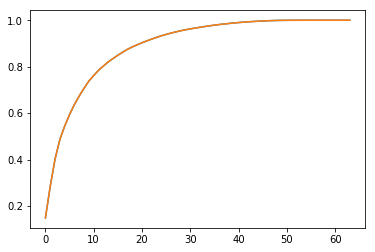

In [16]:
plt.plot(cumsum_variance)
plt.show()

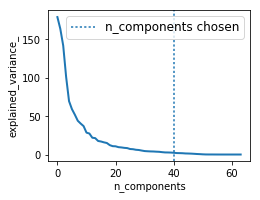

In [2]:

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = decomposition.PCA(n_components=1)
pca.fit(X)
print(pca.explained_variance_ratio_)  

[ 0.99244289]


## 参考文献

- PCA的数学原理，http://blog.codinglabs.org/articles/pca-tutorial.html
- sklearn的PCA函数，http://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html
- PCA思想，http://www.cnblogs.com/pinard/p/6239403.html
- 线性代数预修知识：http://cs229.stanford.edu/section/cs229-linalg.pdf
- 斯坦福大学机器学习：http://cs229.stanford.edu/materials.html
- 维基百科：https://en.wikipedia.org/wiki/Principal_component_analysis